In [ ]:
# ======================
# 📌 IMPORT LIBRARY
# ======================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ======================
# 📌 EVALUASI FUNCTION
# ======================
def eval_cls(y_true, y_pred, y_proba, model_name, dataset_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    if len(np.unique(y_true)) == 2:
        auc = roc_auc_score(y_true, y_proba)
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC={auc:.2f})')
    else:
        auc = roc_auc_score(y_true, y_proba, multi_class='ovr', average='macro')
        print(f"ROC AUC (multi-class OVR): {auc:.4f}")

    print(f"\n{model_name} ({dataset_name})")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

# ======================
# 📌 PROCESS DATASET FUNCTION
# ======================
def process_dataset(file, dataset_name, target_col):
    df = pd.read_csv(file).dropna()
    print(f"\nProcessing {dataset_name} | Columns: {df.columns.tolist()}")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Factorize target if needed
    if y.dtype == 'O' or y.nunique() > 2:
        y = pd.factorize(y)[0]

    # Select only numeric features
    X = X.select_dtypes(include=[np.number])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    bag = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    y_pred_bag = bag.predict(X_test)
    y_proba_bag = bag.predict_proba(X_test)
    y_proba_bag = y_proba_bag[:,1] if y_proba_bag.shape[1]==2 else y_proba_bag

    boost = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
    y_pred_boost = boost.predict(X_test)
    y_proba_boost = boost.predict_proba(X_test)
    y_proba_boost = y_proba_boost[:,1] if y_proba_boost.shape[1]==2 else y_proba_boost

    plt.figure(figsize=(6,4))
    eval_cls(y_test, y_pred_bag, y_proba_bag, "Bagging", dataset_name)
    eval_cls(y_test, y_pred_boost, y_proba_boost, "Boosting", dataset_name)

    if len(np.unique(y_test)) == 2:
        plt.plot([0,1],[0,1],'k--')
        plt.title(f'ROC Curve - {dataset_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    else:
        plt.close()

# ======================
# 📌 RUN PROCESSES
# ======================
process_dataset('HeartDisease.csv', 'HeartDisease', target_col='num')
process_dataset('CitarumWater.csv', 'CitarumWater', target_col='Class')
process_dataset('income.csv', 'Income', target_col='income')



Processing HeartDisease | Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
ROC AUC (multi-class OVR): 0.7297

Bagging (HeartDisease)
Accuracy: 0.6000, Precision: 0.1877, Recall: 0.2344, F1: 0.2083, AUC: 0.7297
ROC AUC (multi-class OVR): 0.7243

Boosting (HeartDisease)
Accuracy: 0.5500, Precision: 0.2882, Recall: 0.2741, F1: 0.2705, AUC: 0.7243

Processing CitarumWater | Columns: ['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'O2', 'IP', 'Class']
ROC AUC (multi-class OVR): 1.0000

Bagging (CitarumWater)
Accuracy: 0.9980, Precision: 0.9992, Recall: 0.9987, F1: 0.9989, AUC: 1.0000
ROC AUC (multi-class OVR): 1.0000

Boosting (CitarumWater)
Accuracy: 0.9980, Precision: 0.9992, Recall: 0.9987, F1: 0.9989, AUC: 1.0000

Processing Income | Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',

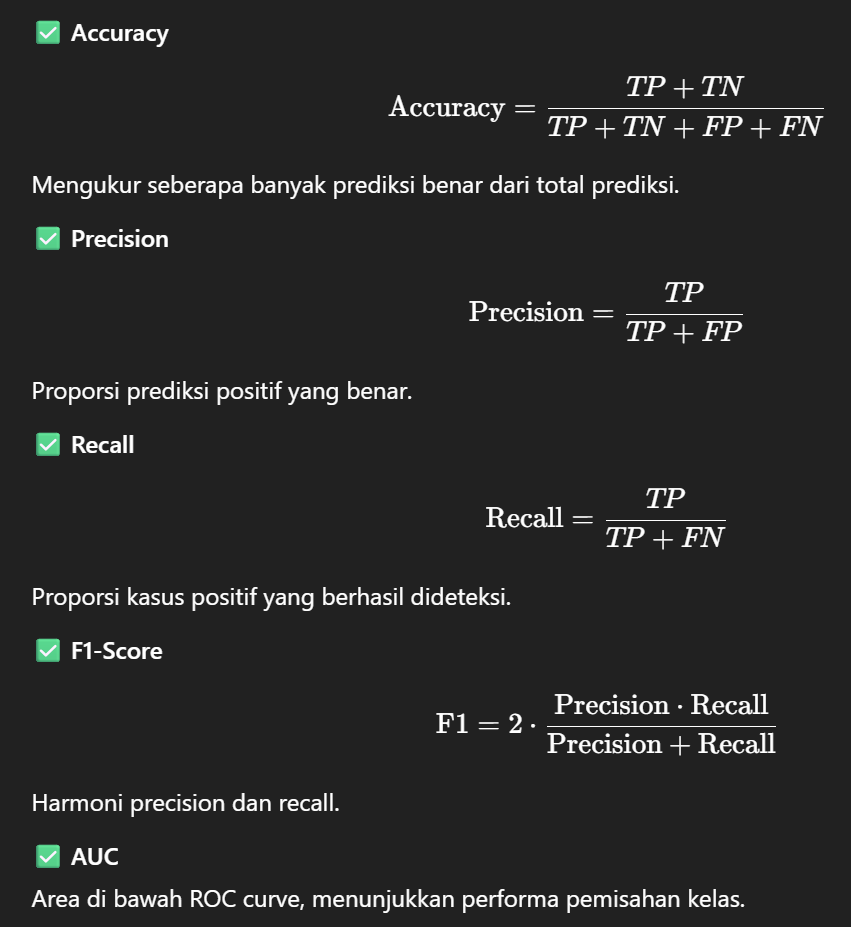